In [63]:
import boto3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Load AWS keys from disk
with open('../../s3-access-keys.txt', "r") as f:
    ACCESS_KEY, SECRET_KEY = f.readline().strip().split()

In [65]:
# Connect to S3
s3 = boto3.resource("s3", aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY)
bucket = s3.Bucket(name="zep-tda")

In [66]:
# Specify date
date = "2020-11-23"

In [67]:
# Load csv-files
prefix = f"experiments/rc-car/recordings/data/{date}/"

df = pd.DataFrame()

for obj in bucket.objects.filter(Prefix=prefix):
    response = obj.get()
    chunk = pd.read_csv(response['Body'], index_col=0)
    
    df = df.append(chunk)

In [68]:
df.tail()

,ABS_RX,ABS_Y
2020-11-23_16-09-09-325398,0.0,0.5
2020-11-23_16-09-09-930461,0.0,0.4
2020-11-23_16-09-10-535717,-1.0,0.4
2020-11-23_16-09-11-140484,0.0,0.4
2020-11-23_16-09-11-745636,0.9,0.5


In [69]:
df.shape

(271, 2)

In [70]:
df["ABS_RX"].value_counts()

 0.0    100
-1.0     80
 1.0     15
-0.9     12
-0.8      8
-0.7      8
 0.9      7
-0.2      5
 0.1      5
-0.3      4
 0.5      4
-0.5      4
 0.8      4
 0.2      3
-0.1      3
-0.6      3
 0.6      2
 0.4      2
 0.3      1
-0.4      1
Name: ABS_RX, dtype: int64

In [71]:
df["ABS_Y"].value_counts()

 0.0    72
 0.5    66
 0.4    40
 0.6    27
 0.3    11
 0.1    10
 0.2    10
 0.7     9
-0.1     6
 0.9     4
-0.2     3
 1.0     3
 0.8     3
-0.3     2
-0.4     1
-0.7     1
-0.6     1
-0.9     1
-0.5     1
Name: ABS_Y, dtype: int64

In [72]:
#Load images
from PIL import Image
prefix = f"experiments/rc-car/recordings/images/{date}"
destination = "test-data/"

images = []
for i, obj in enumerate(bucket.objects.filter(Prefix=prefix)):
    
    # Print progress
    #if i%100 == 0:
    #    print(i)
    if i<=260:
        continue
        
    
    # Download to folder
    bucket.download_file(obj.key, destination+obj.key.split("/")[-1])
    
    # Download to numpy array
    response = obj.get()
    img = Image.open(response["Body"])
    img = np.array(img)
    images.append(img)
    
images = np.asarray(images)
print(images.shape)

(10, 224, 224, 3)


In [73]:
# storage in mb
images.nbytes /(1024*1024)

1.435546875

### Plot pictures

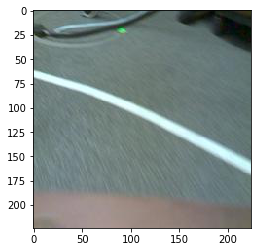

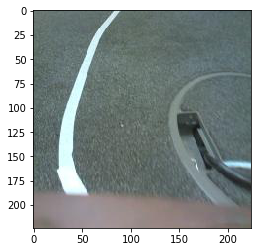

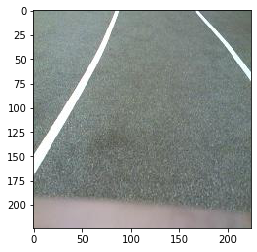

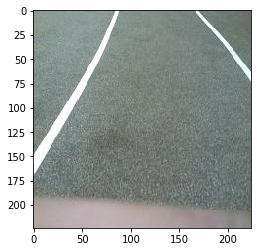

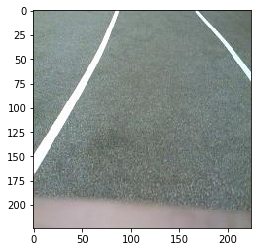

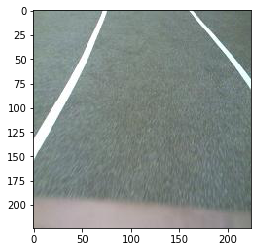

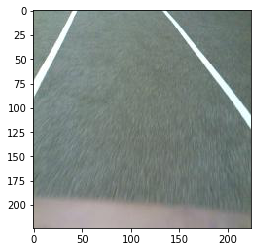

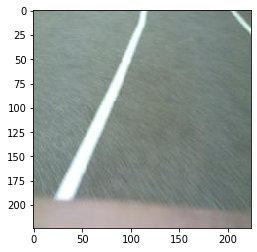

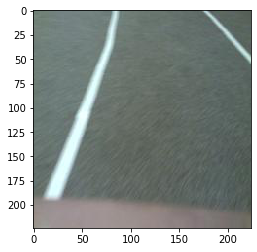

IndexError: index 10 is out of bounds for axis 0 with size 10

In [75]:
for i in range(1,11,1):
    img = images[i]
    plt.imshow(img)
    plt.show()

In [18]:
# left, straight, right
tstamps = ["2020-06-16_09-09-17-717871", "2020-06-16_09-04-01-009389", "2020-06-16_16-05-04-245544"]

In [21]:
#df.loc["2020-06-16_09-09-17-717871"]

In [24]:
df.index

Index(['2020-11-23_13-54-16-640351', '2020-11-23_13-54-17-300658',
       '2020-11-23_13-54-17-905958', '2020-11-23_13-54-18-511350',
       '2020-11-23_13-54-19-117156', '2020-11-23_13-54-19-722535',
       '2020-11-23_13-54-20-327868', '2020-11-23_13-54-20-933363',
       '2020-11-23_13-54-21-538824', '2020-11-23_13-54-22-144646',
       '2020-11-23_13-54-22-749547', '2020-11-23_13-54-23-354523',
       '2020-11-23_13-54-23-959412', '2020-11-23_13-54-24-564901',
       '2020-11-23_13-54-25-169484', '2020-11-23_13-54-25-774735',
       '2020-11-23_13-54-26-379690', '2020-11-23_13-54-26-984228',
       '2020-11-23_13-54-27-588991'],
      dtype='object')

In [25]:
from keras.preprocessing import image

for t in df.index:
    print(df.loc[t,["ABS_RX", "ABS_Y"]])
    img_path = f"/data01/nsturma/autopilot/{t}.jpg"
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.show()

Using TensorFlow backend.


ImportError: Could not find 'nvcuda.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Typically it is installed in 'C:\Windows\System32'. If it is not present, ensure that you have a CUDA-capable GPU with the correct driver installed.

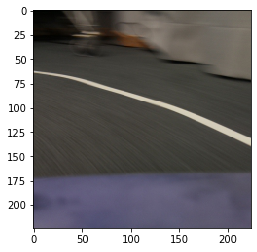

### Cut images

In [37]:
# cut them
im_small = images[:,:170,:,:]
im_small.shape

(2340, 170, 224, 3)

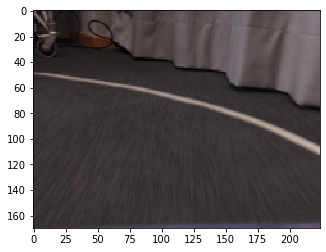

In [43]:
img = im_small[1853]
plt.imshow(img)

In [14]:
# Normalize the images to [-0.5, 0.5]
#images = (images / 255) 